In [1]:
# 도구 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
train_data = pd.read_csv('./train.csv', index_col='no')
test_data = pd.read_csv('./test.csv', index_col='no')

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train_data['sex'] = le.fit_transform(train_data['sex'])
train_data['education'] = le.fit_transform(train_data['education'])

test_data['sex'] = le.fit_transform(test_data['sex'])
test_data['education'] = le.fit_transform(test_data['education'])

In [4]:
train_p = train_data.iloc[:, :-1]
train_p = pd.get_dummies(train_p)

X_train = train_p
y_train = train_data['income']

X_test = pd.get_dummies(test_data)

In [ ]:
# from sklearn.preprocessing import StandardScaler

# s_scaler = StandardScaler()

# s_scaler.fit(X_train)

# t_X_train = s_scaler.transform(X_train)
# t_X_test = s_scaler.transform(X_test)

In [7]:
print(set(X_train.columns) - set(X_test.columns))
X_test['native-country_ Holand-Netherlands']=0
X_test = X_test[X_train.columns]

{'native-country_ Holand-Netherlands'}


In [8]:
num=[]
result=[]
for i in range(5, 20):
    tree_model = DecisionTreeClassifier(max_depth=i)

    tree_model.fit(X_train, y_train)

    pre = tree_model.predict(X_test)
    
    num.append(i)
    result.append(cross_val_score(tree_model, X_train, y_train, cv=5).mean())

In [9]:
dict(zip(num, result))

{5: 0.8438832963658079,
 6: 0.8481829039413069,
 7: 0.8521753966899845,
 8: 0.8531991127793891,
 9: 0.8531991127793892,
 10: 0.8514587954274015,
 11: 0.8507080702951715,
 12: 0.8487971335949496,
 13: 0.8468179491554343,
 14: 0.8452823750213273,
 15: 0.8428595802764033,
 16: 0.8389694591366661,
 17: 0.8358641869988057,
 18: 0.8335437638628219,
 19: 0.8304726155946083}

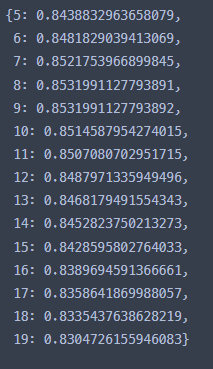

In [11]:
tree1 = DecisionTreeClassifier(max_depth=7)
tree1.fit(X_train, y_train)

tree2 = DecisionTreeClassifier(max_depth=8)
tree2.fit(X_train, y_train)

tree3 = DecisionTreeClassifier(max_depth=9)
tree3.fit(X_train, y_train)

tree4 = DecisionTreeClassifier(max_depth=10)
tree4.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [10]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [12]:
forest = RandomForestClassifier(n_estimators=100, random_state=7)
cross_val_score(forest, X_train, y_train, cv=5)

array([0.85343798, 0.85958028, 0.85002559, 0.85685037, 0.85326736])

In [13]:
ada = AdaBoostClassifier(n_estimators=100, random_state=7)
cross_val_score(ada, X_train, y_train, cv=5)

array([0.86316328, 0.86879372, 0.85958028, 0.86589319, 0.86282204])

In [17]:
!pip install xgboost


     --------------------------------------- 70.9/70.9 MB 19.8 MB/s eta 0:00:00


In [19]:
from xgboost import XGBClassifier

In [44]:
model = XGBClassifier(n_estimators=400, learning_rate=0.1,
                      max_depth=4)
model.fit(X_train, y_train)

#array([0.87169425, 0.87322982, 0.86930558, 0.8730592 , 0.87493602]) max:4
# array([0.86350452, 0.87015868, 0.864187  , 0.87169425, 0.86589319]) max:5
# array([0.86538133, 0.8730592 , 0.86623443, 0.87237673, 0.87118239]) max:6
# array([0.86316328, 0.87254735, 0.8588978 , 0.86350452, 0.86384576]) max:7
# array([0.8544617 , 0.85770346, 0.8483194 , 0.85343798, 0.85121993]) max:9

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=400, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [45]:
cross_val_score(model, X_train, y_train, cv=5)

array([0.87169425, 0.87322982, 0.86930558, 0.8730592 , 0.87493602])

In [54]:
num=[]
result=[]
for i in range(1, 20):
    model = XGBClassifier(n_estimators=400, learning_rate=0.1,
                      max_depth=i)

    model.fit(X_train, y_train)

#     pre = model.predict(X_test)
    
    num.append(i)
    result.append(cross_val_score(model, X_train, y_train, cv=5))

dict(zip(num, result))

{1: array([0.86111585, 0.86623443, 0.8536086 , 0.86009213, 0.8544617 ]),
 2: array([0.86759939, 0.87630097, 0.86401638, 0.87357106, 0.8686231 ]),
 3: array([0.8694762 , 0.87647159, 0.86930558, 0.87527726, 0.8730592 ]),
 4: array([0.87169425, 0.87322982, 0.86930558, 0.8730592 , 0.87493602]),
 5: array([0.87015868, 0.87544788, 0.86981744, 0.87237673, 0.8730592 ]),
 6: array([0.86538133, 0.8730592 , 0.86623443, 0.87237673, 0.87118239]),
 7: array([0.86674629, 0.87374168, 0.86452824, 0.87374168, 0.87049991]),
 8: array([0.8650401 , 0.87067053, 0.86623443, 0.86998806, 0.86879372]),
 9: array([0.86486948, 0.86708753, 0.864187  , 0.86708753, 0.86555195]),
 10: array([0.86384576, 0.87220611, 0.86401638, 0.86640505, 0.86572257]),
 11: array([0.86128647, 0.86913496, 0.85923904, 0.86657567, 0.86316328]),
 12: array([0.86213957, 0.86606381, 0.86179833, 0.86401638, 0.86179833]),
 13: array([0.85855656, 0.86998806, 0.85736222, 0.86282204, 0.85702099]),
 14: array([0.86179833, 0.86623443, 0.85719161,

In [46]:
pre = model.predict(X_test)
pre

array([0, 0, 0, ..., 1, 0, 0])

In [47]:
sub = pd.read_csv('./sample_submission.csv', index_col='no')

In [48]:
sub['income'] = pre

In [49]:
sub.to_csv('./kaggle_jyj02.csv', index=True)

In [53]:
train_data.corr()

,age,fnlwgt,education,education-num,sex,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.075753,-0.010707,0.035084,0.083999,0.078498,0.054413,0.073100,0.238460
fnlwgt,-0.075753,1.000000,-0.022574,-0.030600,0.029929,-0.005051,-0.001513,-0.010154,-0.002994
education,-0.010707,-0.022574,1.000000,0.358224,-0.024049,0.028027,0.021188,0.055359,0.081312
education-num,0.035084,-0.030600,0.358224,1.000000,0.017029,0.127651,0.083925,0.147569,0.331798
sex,0.083999,0.029929,-0.024049,0.017029,1.000000,0.050664,0.042925,0.231437,0.215613
capital-gain,0.078498,-0.005051,0.028027,0.127651,0.050664,1.000000,-0.031401,0.088609,0.221387
capital-loss,0.054413,-0.001513,0.021188,0.083925,0.042925,-0.031401,1.000000,0.055271,0.135645
hours-per-week,0.073100,-0.010154,0.055359,0.147569,0.231437,0.088609,0.055271,1.000000,0.231045
income,0.238460,-0.002994,0.081312,0.331798,0.215613,0.221387,0.135645,0.231045,1.000000
